# Desafío 3 - Grupo 4
---
#### Aplicación de modelos predictivos para clasificación
**Integrantes:**<br/>
Dinora García Santacruz <br/>
Maria José Sager<br/>
Horacio E. Suarez

<a id="section_toc"></a> 

---

## Tabla de Contenidos

[1- Descripción del Dataset Mushrooms](#section_1)

&emsp; [1.1- Analisis de contenido y forma](#section_1_1)

&emsp; [1.2- Descripción de contenido, nulos y cantidad de valores](#section_1_2)

[2- Análisis exploratorio y preprocesamiento de los datos](#section_2)

&emsp; [2.1- Conversion del tipo de variable a panda 'categorical'](#section_2_1)

&emsp; [2.2- Heatmap general de correlaciones](#section_2_2)

&emsp; [2.3- Heatmap de correlación con la variable target](#section_2_3)

&emsp; [2.4- Distribución de cada feature con referencia a la variable target](#section_2_4)

[3- Preparación de los datos para entrenamiento y testeo](#section_3)

&emsp; [3.1- Train, test, split](#section_3_1)

&emsp; [3.2- Codificación con OneHotEncoder](#section_3_2)

[4- Modelos KNN y Linear Regression](#section_4)

&emsp; [4.1- GridSearchCV para KNN y LogisticRegression](#section_4_1)

&emsp; [4.2- Predicciones, evaluación de acuracy y matriz de confusión](#section_4_2)

&emsp; [4.3- Curva ROC y evaluación de coeficientes](#section_4_3)

[5- Modelos alternativos Naive Bayes, DecisionTree y RandomForest](#section_5)

&emsp; [5.1- Naive Bayes con evaluación del modelo](#section_5_1)

&emsp; [5.2- DesicionTree con evaluación del modelo](#section_5_2)

&emsp; [5.3- RandomForest con evaluación del modelo](#section_5_3)




<a id="section_1"></a> 
###  1- Descripción del Dataset Mushrooms
[volver a TOC](#section_toc)

----
<b><a id='section_1_1'>1.1- Analisis de contenido y forma</a></b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [3]:
data_location = "../Data/Hongos/mushrooms.csv"
data = pd.read_csv(data_location, sep=",")
print(data.shape)
data.head(3)

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


----
<b><a id='section_1_2'>1.2- Descripción de contenido, nulos y cantidad de valores</a></b>

In [4]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example


data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
class,object,0.0,0,2,"[p, e]"
cap-shape,object,0.0,0,6,"[x, b, s, f, k, c]"
cap-surface,object,0.0,0,4,"[s, y, f, g]"
cap-color,object,0.0,0,10,"[n, y, w, g, e, p, b, u, c, r]"
bruises,object,0.0,0,2,"[t, f]"
odor,object,0.0,0,9,"[p, a, l, n, f, c, y, s, m]"
gill-attachment,object,0.0,0,2,"[f, a]"
gill-spacing,object,0.0,0,2,"[c, w]"
gill-size,object,0.0,0,2,"[n, b]"
gill-color,object,0.0,0,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [5]:
# Analizamos la proporción entre clases Target
data['class'].value_counts(normalize=True).round(2)

e    0.52
p    0.48
Name: class, dtype: float64

<a id="section_2"></a> 
###  2- Análisis exploratorio y preprocesamiento de los datos
[volver a TOC](#section_toc)

---
<b><a id='section_2_1'>2.1. Conversion del tipo de variable a pandas 'categorical'</a></b>

Cambio de los valores de las features (object a categorical)

In [6]:
def summarize_categoricals(data, show_levels=False):
    """ Display uniqueness in each column """
    df_temp = pd.DataFrame([[data[col].unique(), len(data[col].unique()), data[col].isnull().sum()] for col in data.columns],
                           index=data.columns, columns=['Levels', 
                                                      'No. of Levels',
                                                      'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]


def find_categorical(data, cutoff=10):
    """ Function to find categorical columns in the dataframe. """
    cat_cols = []
    for col in data.columns:
        if len(data[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


def to_categorical(columns, data):
    """ Converts the columns passed in `columns` to categorical datatype. """
    for col in columns:
        data[col] = data[col].astype('category')
    return data

In [7]:
summarize_categoricals(data, show_levels=True)

,Levels,No. of Levels,No. of Missing Values
class,"[p, e]",2,0
cap-shape,"[x, b, s, f, k, c]",6,0
cap-surface,"[s, y, f, g]",4,0
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10,0
bruises,"[t, f]",2,0
odor,"[p, a, l, n, f, c, y, s, m]",9,0
gill-attachment,"[f, a]",2,0
gill-spacing,"[c, w]",2,0
gill-size,"[n, b]",2,0
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12,0


In [8]:
data_cat = to_categorical(find_categorical(data, cutoff=12), data)

data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

Como 'veil-type' solo tiene un valor, la eliminamos

In [9]:
data_cat.drop(labels=['veil-type'], axis=1, inplace=True)

In [10]:
data_cat.shape

(8124, 22)

In [11]:
# Movemos la columna target al final
new_order = list(data_cat.columns)
new_order.append(new_order.pop(0))
data_cat = data_cat[new_order]

In [12]:
from scipy.stats import chi2_contingency

In [13]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
        Taken from here:
        https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
    """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

In [14]:
def categorical_corr_matrix(data):
    """
        Computes corrected Cramer's V statistic between all the categorical variables in the dataframe
    """
    data = data.select_dtypes(include='category')
    cols = data.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            df_crosstab = pd.crosstab(data[col1], data[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(df_crosstab)
    
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix
            

---
<b><a id='section_2_2'>2.2. Heatmap general de correlaciones</a></b>

##### Matriz de correlacion

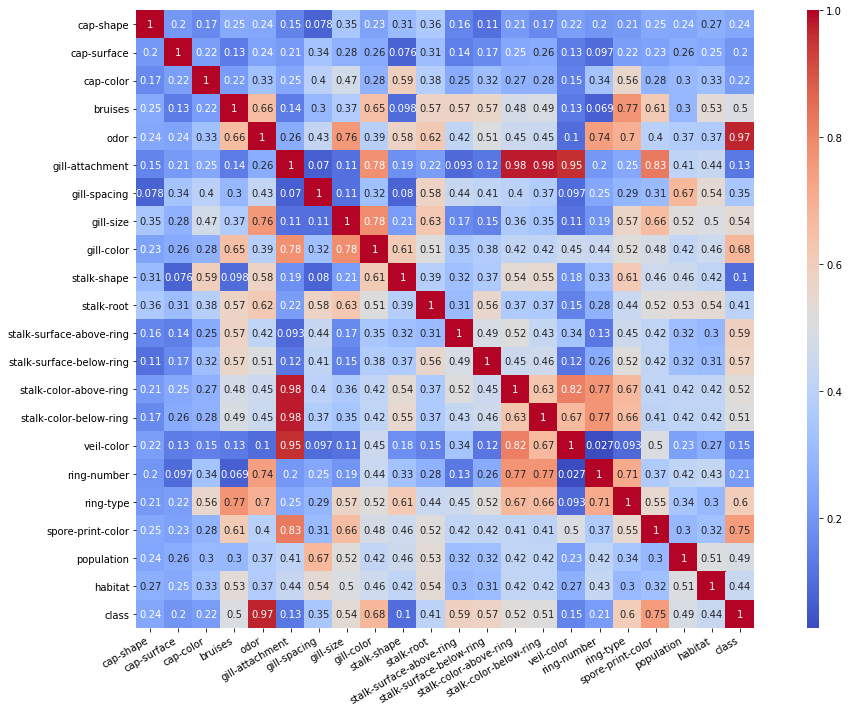

In [15]:
corr_matrix_cat = categorical_corr_matrix(data_cat)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix_cat, annot=True, cmap='coolwarm', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

---
<b><a id='section_2_3'>2.3. Heatmap de correlación con la variable target</a></b>

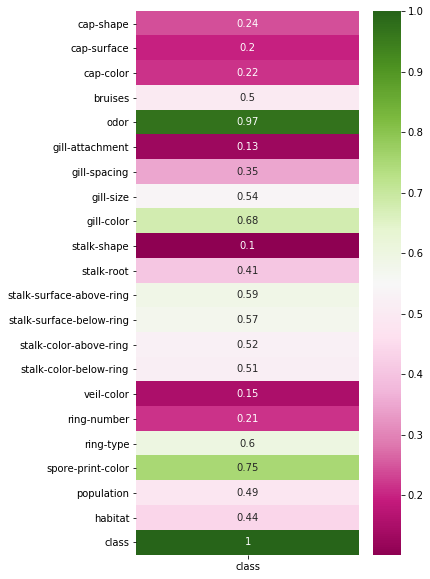

In [16]:
plt.figure(figsize=(5,10))
sns.heatmap(corr_matrix_cat[['class']], cmap="PiYG", annot=True)

---
<b><a id='section_2_4'>2.4. Distribución de cada feature con referencia a la variable target</a></b>

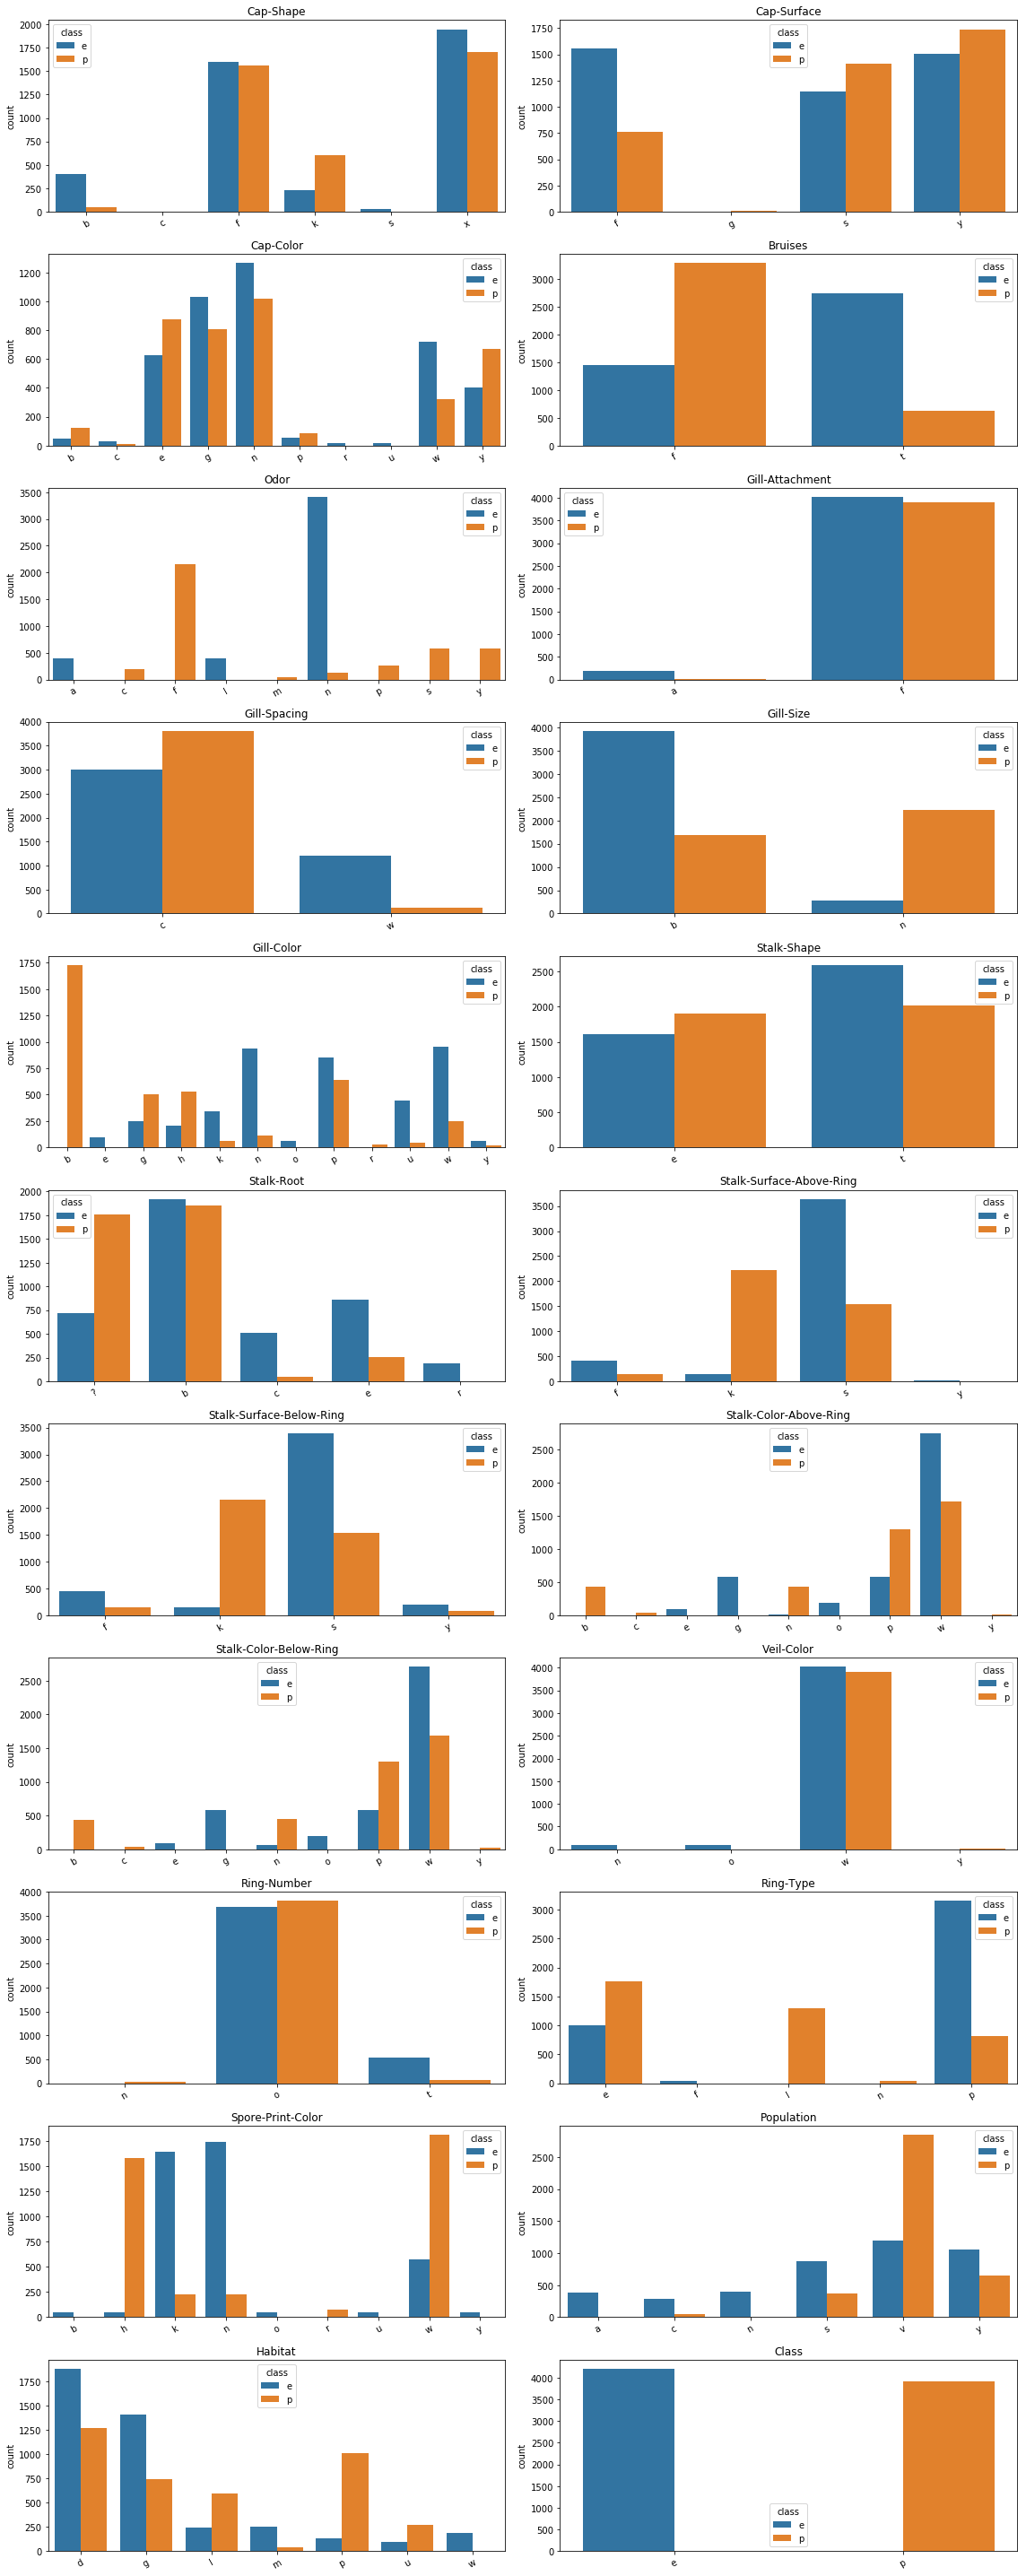

In [17]:
fig, axs = plt.subplots(nrows=11, ncols=2, figsize=(16, 40))
ax_title_pairs = zip(axs.flat, list(data_cat.columns))

for ax, title in ax_title_pairs:
    sns.countplot(x=title, data=data_cat , hue='class', ax=ax)
    ax.set_title(title.title())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.set_xlabel('')

#axs[7][1].set_axis_off()
#axs[7][2].set_axis_off()
plt.tight_layout()

<a id="section_3"></a> 
###  3- Preparación de los datos para entrenamiento y testeo
[volver a TOC](#section_toc)

---
<b><a id='section_3_1'>3.1. Train, test, split</a></b>

In [18]:
# 1 es 'poisoned' 0 es 'edible'
data['class']= data['class'].apply(lambda x: 1 if x is 'p' else 0)
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [19]:
X = data.drop(['class'], axis=1)
y = data['class']
print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=12)

In [21]:
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

0    0.52
1    0.48
Name: class, dtype: float64

0    0.52
1    0.48
Name: class, dtype: float64

---
<b><a id='section_3_2'>3.2. Codificación con OneHotEncoder</a></b>

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X_train_encoder = encoder.fit_transform(X_train)
X_test_encoder = encoder.transform(X_test)
#encoder.get_feature_names(input_features=X_train.columns)

<a id="section_4"></a> 
###  4- Modelos KNN y Linear Regression
[volver a TOC](#section_toc)

---
<b><a id='section_4_1'>4.1. GridSearchCV para KNN y LogisticRegression</a></b>

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

In [24]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [25]:
k_range = list(range(1, 30))
C = np.linspace(0.09,0.29,10)
solver = ['lbfgs']
penalty = ['l2']
weight_options = ['uniform', 'distance']
#class_weight = ['balanced']


In [26]:
param_grid_lr = dict(C=C, solver=solver, penalty=penalty)
print(param_grid_lr)

{'C': array([0.09      , 0.11222222, 0.13444444, 0.15666667, 0.17888889,
       0.20111111, 0.22333333, 0.24555556, 0.26777778, 0.29      ]), 'solver': ['lbfgs'], 'penalty': ['l2']}


In [27]:
param_grid_knn = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


Evaluamos la mejor configuración de hiperparámetros de cada modelo: **LogReg** y **KNN**

In [28]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5, random_state=19, shuffle=True)

In [29]:
grid_lr = GridSearchCV(lr, param_grid_lr, cv=folds, scoring='accuracy')
grid_lr.fit(X_train_encoder, y_train)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=folds, scoring='accuracy')
grid_knn.fit(X_train_encoder, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

---
<b><a id='section_4_2'>4.2. Predicciones, evaluación de acuracy y matriz de confusión</a></b>

In [30]:
print("Logistic Regression:")
print(grid_lr.best_estimator_)
print(grid_lr.best_score_)
print(grid_lr.best_params_)
print("")
print("KNN:")
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

Logistic Regression:
LogisticRegression(C=0.2233333333333333)
0.998277073903744
{'C': 0.2233333333333333, 'penalty': 'l2', 'solver': 'lbfgs'}

KNN:
KNeighborsClassifier(n_neighbors=1)
1.0
{'n_neighbors': 1, 'weights': 'uniform'}


In [31]:
y_pred_grid_lr = grid_lr.predict(X_test_encoder)
y_pred_grid_knn = grid_knn.predict(X_test_encoder)

In [32]:
print (classification_report(y_test, y_pred_grid_lr))
print (classification_report(y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2104
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2104
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



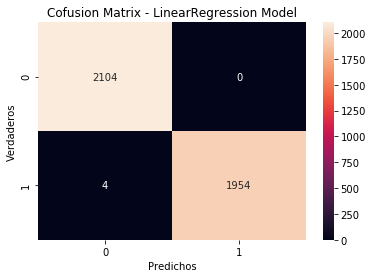

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
confusion_lr = confusion_matrix(y_test, y_pred_grid_lr)
#print(confusion_lr)
confusion_knn = confusion_matrix(y_test, y_pred_grid_knn)
#print(confusion_knn)
sns.heatmap(confusion_lr, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - LinearRegression Model')
plt.xlabel('Predichos');


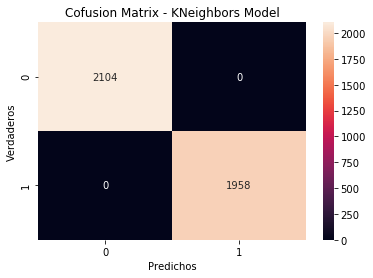

In [34]:
sns.heatmap(confusion_knn, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - KNeighbors Model')
plt.xlabel('Predichos');

In [35]:
y_pred_lr_proba = grid_lr.predict_proba(X_test_encoder)
y_pred_lr_proba_df = pd.DataFrame(y_pred_lr_proba)
#y_pred_lr_proba_df

---
<b><a id='section_4_3'>4.3. Curva ROC y evaluación de coeficientes</a></b>

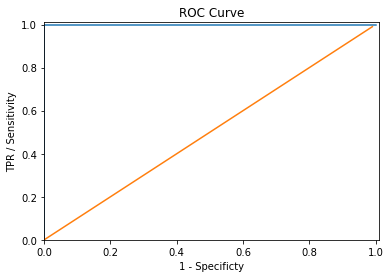

In [36]:
from sklearn.metrics import roc_curve
fpr_lr,tpr_lr,thr_lr = roc_curve(y_test, y_pred_lr_proba[:,1])

df = pd.DataFrame(dict(fpr=fpr_lr, tpr=tpr_lr, thr = thr_lr))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [37]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_lr, tpr_lr))

AUC= 0.9999985435592306


(0, 1)

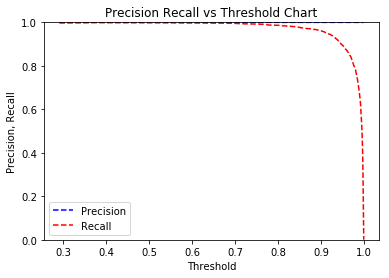

In [38]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr_proba[:,1])
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)
plt.title('Precision Recall vs Threshold Chart')
plt.plot(thresholds, precision[: -1], 'b--', label='Precision')
plt.plot(thresholds, recall[: -1], 'r--', label='Recall')
plt.ylabel('Precision, Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

In [39]:
best_lr= grid_lr.best_estimator_
best_lr

LogisticRegression(C=0.2233333333333333)

Revisión de los coeficientes para el modelo de LR

In [40]:
coeficientes = pd.DataFrame(best_lr.coef_, columns=encoder.get_feature_names(input_features=X_train.columns), index=['Beta']).T
#pd.set_option('display.max_rows', None)
display(coeficientes.sort_values(by='Beta'))

,Beta
odor_n,-2.850288
odor_l,-1.564483
odor_a,-1.487332
gill-size_b,-1.473618
gill-spacing_w,-1.057037
...,...
gill-size_n,1.473670
stalk-root_b,1.495444
odor_c,1.498209
odor_f,1.759016


<a id="section_5"></a> 
###  5- Modelos alternativos Naive Bayes, DecisionTree y RandomForest
[volver a TOC](#section_toc)

---
<b><a id='section_5_1'>5.1. Naive Bayes con evaluación del modelo</a></b>

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gnb = GaussianNB()

gnb.fit(X_train_encoder.todense(), y_train)

GaussianNB()

In [43]:
y_pred_gnb = gnb.predict(X_test_encoder.todense())

y_pred_gnb

array([0, 1, 0, ..., 1, 1, 0])

In [44]:
from sklearn.metrics import accuracy_score
#print(round(accuracy_score(y_test, y_pred_gnb), 2))
print (classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2104
           1       0.91      1.00      0.95      1958

    accuracy                           0.95      4062
   macro avg       0.95      0.95      0.95      4062
weighted avg       0.96      0.95      0.95      4062



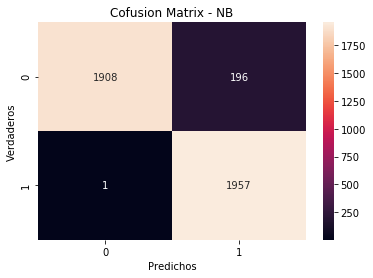

In [45]:
confusion_gnb = confusion_matrix(y_test, y_pred_gnb)
#print(confusion_gnb)
sns.heatmap(confusion_gnb, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - NB')
plt.xlabel('Predichos');

---
<b><a id='section_5_2'>5.2. DesicionTree con evaluación del modelo</a></b>

In [46]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


In [47]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_encoder, y_train)

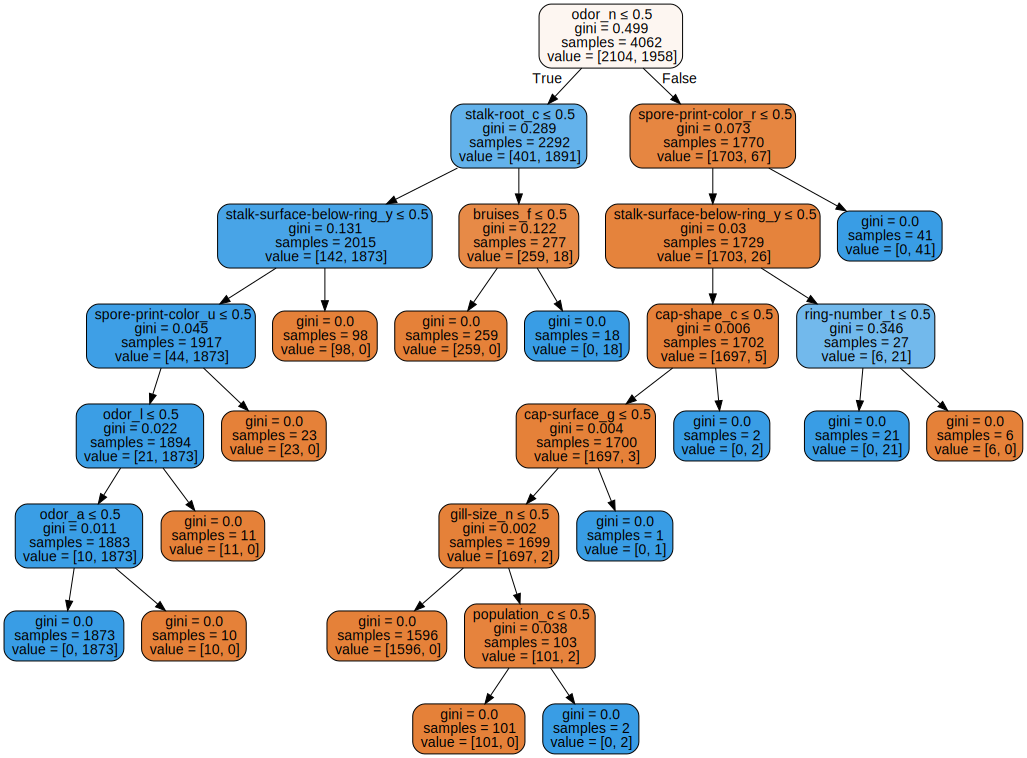

In [48]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=encoder.get_feature_names(input_features=X_train.columns),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [49]:
#import pydotplus
# Exportación del gráfico
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.write_png('original_tree.png')
#pydot_graph.set_size('"5,5!"')
#pydot_graph.write_png('resized_tree.png')

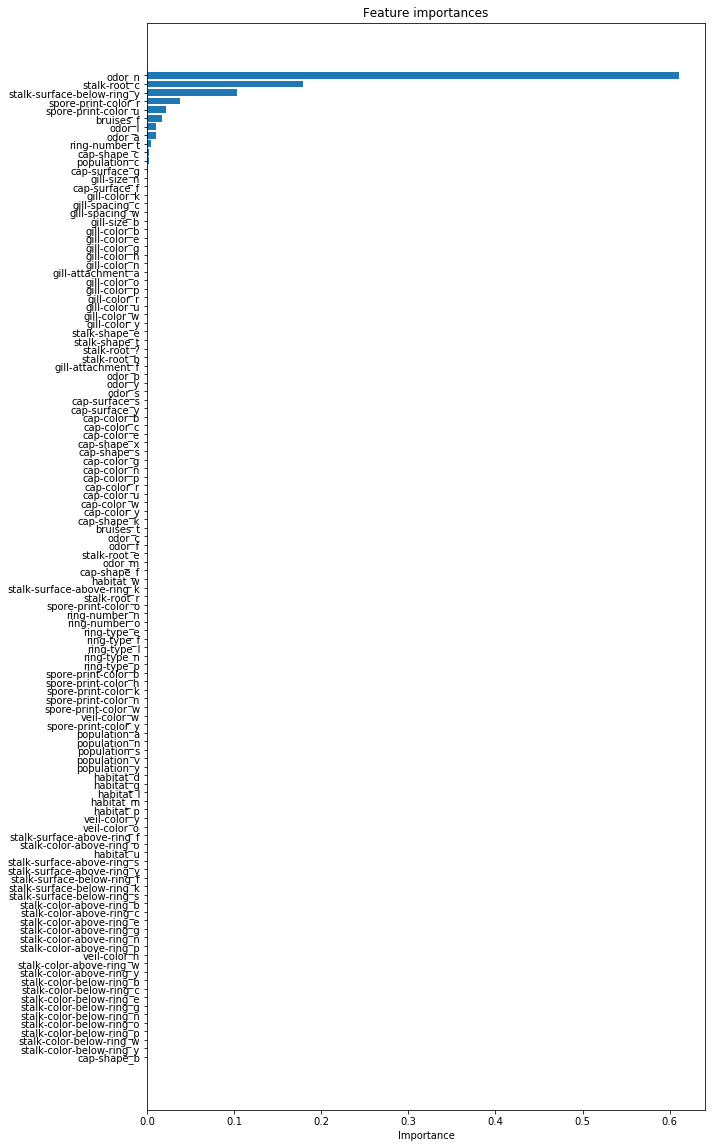

In [50]:
features_list = encoder.get_feature_names(input_features=X_train.columns)
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10,20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [51]:
y_pred_dt = dt.predict(X_test_encoder)

y_pred_dt

array([0, 1, 0, ..., 1, 1, 0])

In [52]:
#round(accuracy_score(y_test, y_pred_dt), 2)
print (classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2104
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



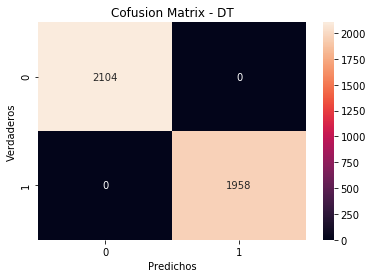

In [53]:
confusion_dt = confusion_matrix(y_test, y_pred_dt)
#print(confusion_dt)
sns.heatmap(confusion_dt, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - DT')
plt.xlabel('Predichos');

---
<b><a id='section_5_3'>5.3. RandomForest con evaluación del modelo</a></b>

Adaptacion de los sets para descartar la feature 'odor'

In [54]:
X_train_no_odor = X_train.drop(['odor'], axis=1)
X_test_no_odor = X_test.drop(['odor'], axis=1)




In [55]:
encoder2 = OneHotEncoder(drop="first")

X_train_no_odor_enco = encoder2.fit_transform(X_train_no_odor)
X_test_no_odor_enco = encoder2.transform(X_test_no_odor)
#encoder.get_feature_names(input_features=X_train.columns)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:


# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rf.fit(X_train_no_odor_enco, y_train)

RandomForestClassifier(max_features='sqrt')

In [58]:
# Actual class predictions
y_pred_rf = rf.predict(X_test_no_odor_enco)
# Probabilities for each class
rf_probs = rf.predict_proba(X_test_no_odor_enco)[:, 1]

In [59]:
print (classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2104
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



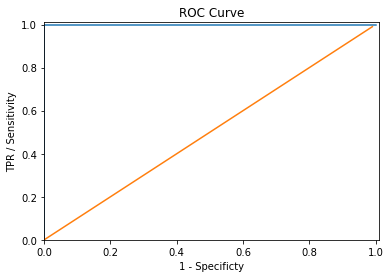

In [60]:

fpr_lr,tpr_lr,thr_lr = roc_curve(y_test, rf_probs)

df = pd.DataFrame(dict(fpr=fpr_lr, tpr=tpr_lr, thr = thr_lr))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

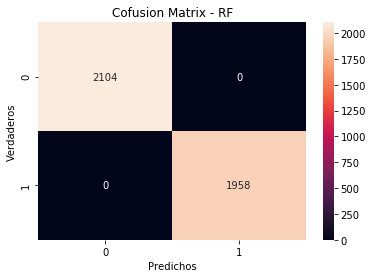

In [61]:
confusion_rf = confusion_matrix(y_test, y_pred_rf)
#print(confusion_dt)
sns.heatmap(confusion_dt, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - RF')
plt.xlabel('Predichos');

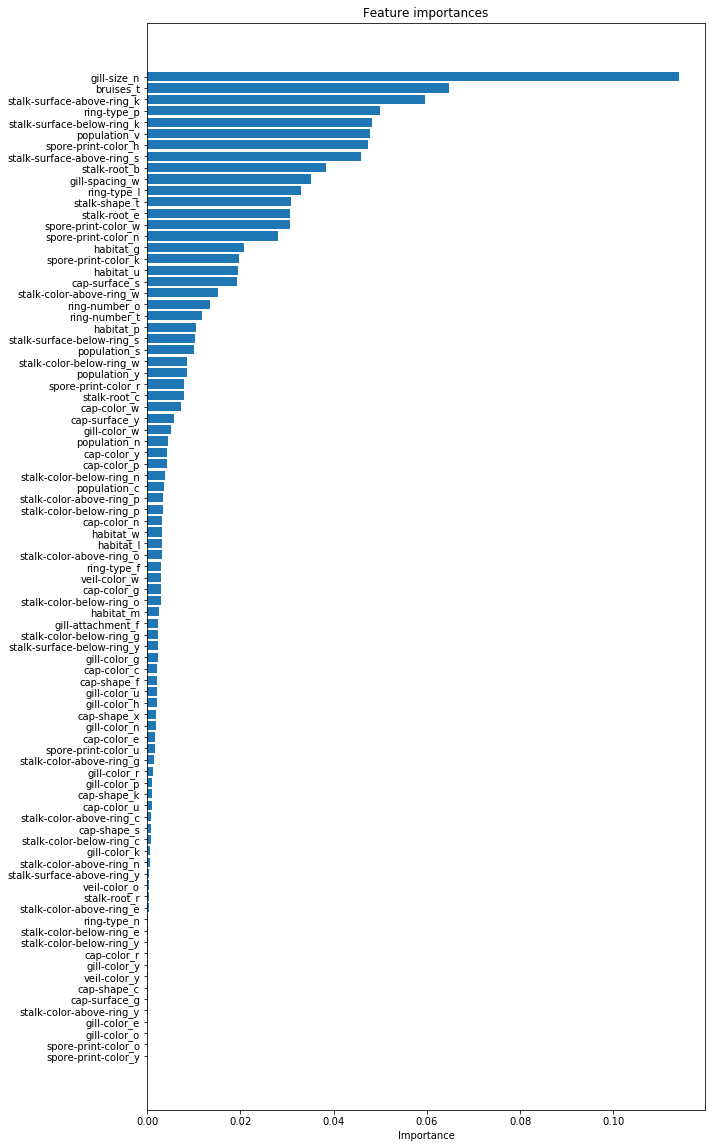

In [62]:
features_list_rf = encoder2.get_feature_names(input_features=X_train_no_odor.columns)
feature_importance_rf = rf.feature_importances_
sorted_idx = np.argsort(feature_importance_rf)

plt.figure(figsize=(10,20))
plt.barh(range(len(sorted_idx)), feature_importance_rf[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list_rf[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()